In [1]:
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data, train_targets) , (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [6]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean

In [8]:
std = train_data.std(axis=0)
train_data /= std

In [9]:
test_data -= mean
test_data /= std

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])
    return model

In [12]:
import numpy as np

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [14]:
for i in range(k):
    print("Processing Fold # ",i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                        train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                        train_targets[(i+1)*num_val_samples:]], axis = 0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs,
             batch_size = 1, verbose= 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

Processing Fold #  0
Processing Fold #  1
Processing Fold #  2
Processing Fold #  3


In [15]:
all_scores

[2.2028534412384033, 2.8503899574279785, 2.653315544128418, 2.4024384021759033]

In [16]:
np.mean(all_scores)

2.527249336242676

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print("Processing Fold # ",i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                        train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                        train_targets[(i+1)*num_val_samples:]], axis = 0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs,
             batch_size = 1, verbose= 0, validation_data = (val_data,val_targets))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold #  0
Processing Fold #  1
Processing Fold #  2
Processing Fold #  3


In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

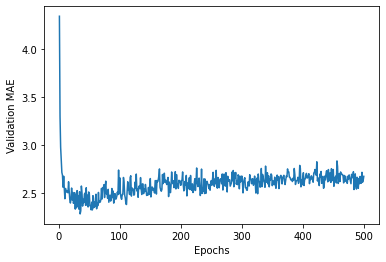

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,num_epochs+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show();

In [23]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [24]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

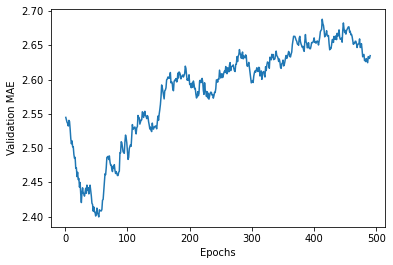

In [27]:
plt.plot(range(1,num_epochs-9),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show();

In [28]:
model = build_model()

In [29]:
model.fit(train_data, train_targets, epochs=80, batch_size = 16, verbose=0)

In [30]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 8ms/step - loss: 18.4990 - mae: 2.6673


In [31]:
test_mae_score

2.6673028469085693